Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It is a critical step in the data science process, helping to understand the data better before making any assumptions or building models. EDA is about discovering patterns, spotting anomalies, testing hypotheses, and checking assumptions with the help of summary statistics and graphical representations.

**Key steps in EDA include:**

    Data Collection and Importing: Gathering the data from various sources and loading it into a data frame or similar structure.

    Data Cleaning: Handling missing values, correcting inconsistencies, and dealing with outliers.

    Descriptive Statistics: Calculating summary statistics like mean, median, mode, variance, standard deviation, etc.

    Data Visualization: Using plots such as histograms, box plots, scatter plots, bar charts, and heatmaps to visualize data distributions and relationships.

    Identifying Patterns and Trends: Looking for patterns, trends, and correlations within the data.

    Testing Hypotheses: Formulating and testing hypotheses about the data.

    Feature Engineering: Creating new features or modifying existing ones to better capture the underlying structure of the data. 

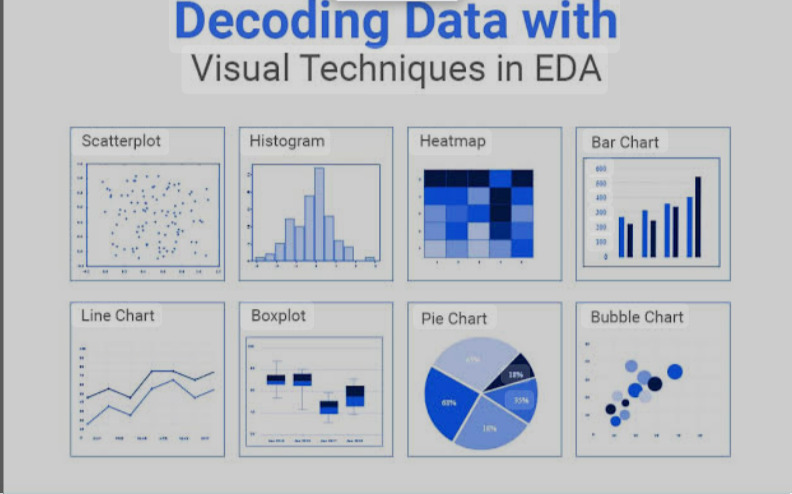

**Benefits of EDA:**

    Better Understanding: Provides a deeper understanding of the dataset.
    Data Quality: Helps identify data quality issues.
    Informing Modeling: Guides the selection of appropriate modeling techniques.
    Hypothesis Generation: Generates hypotheses about the underlying mechanisms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the movie review data
movies_review = pd.read_csv("https://raw.githubusercontent.com/suyashi29/Generative-AI-for-NLP/main/movie_reviews.csv")

In [3]:
movies_review

,Movie,Review,Sentiment
0,Pulp Fiction,The special effects were incredible.,0
1,The Dark Knight,The film lacked originality.,1
2,Forrest Gump,The screenplay was poorly written.,1
3,Fight Club,Predictable plot.,0
4,The Dark Knight,Disappointing ending.,1
...,...,...,...
3995,The Dark Knight,The screenplay was poorly written.,0
3996,Goodfellas,I didn't like the plot twist.,0
3997,The Shawshank Redemption,The screenplay was poorly written.,1
3998,The Matrix,The screenplay was poorly written.,0


In [4]:
# EDA
print("Summary Statistics:")
print(movies_review.describe())

Summary Statistics:
         Sentiment
count  4000.000000
mean      0.510000
std       0.499962
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [5]:
print(movies_review.describe(include="object"))

             Movie                               Review
count         4000                                 4000
unique          10                                   20
top     Goodfellas  The movie was absolutely fantastic!
freq           435                                  224


In [6]:
# Count positive and negative sentiments
positive_count = movies_review[movies_review['Sentiment'] == 1].shape[0]
negative_count = movies_review[movies_review['Sentiment'] == 0].shape[0]
print(f'Positive Sentiments: {positive_count}')
print(f'Negative Sentiments: {negative_count}')

Positive Sentiments: 2040
Negative Sentiments: 1960


In [7]:
movies_review.info()#check for null values any available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      4000 non-null   object
 1   Review     4000 non-null   object
 2   Sentiment  4000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
#nltk.download('punkt')
#nltk.download('stopwords')

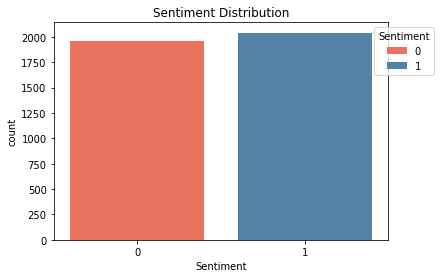

In [9]:
# Plot sentiment distribution
# Using a custom list of colors
custom_colors = ['#FF6347', '#4682B4'] # Tomato and SteelBlue

sns.countplot(x='Sentiment', data=movies_review, hue='Sentiment',palette=custom_colors)
plt.title('Sentiment Distribution')

# Move legend outside the plot (upper right, outside the axes)
plt.legend(title='Sentiment', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()
#hue will be used if you want to see different colors for a category

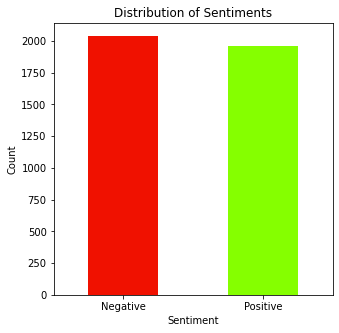

In [10]:
# Distribution of sentiments
plt.figure(figsize=(5, 5))
sentiment_counts = movies_review['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['#f01100', '#85ff00'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(len(sentiment_counts)), ['Negative', 'Positive'], rotation=0)
plt.show()

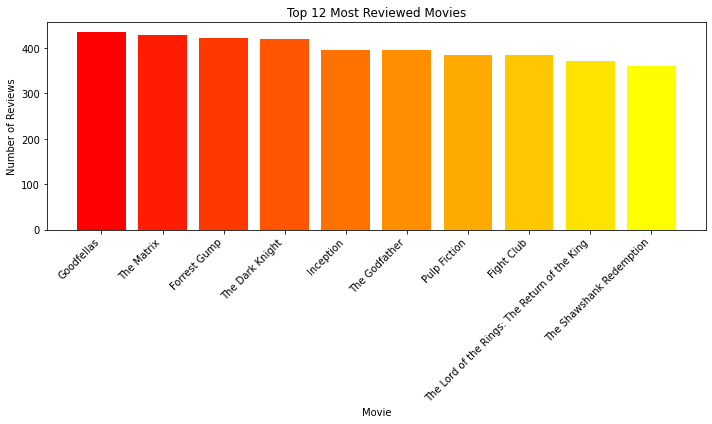

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(10, 6))
movie_review_counts = movies_review['Movie'].value_counts().head(12)
bars = plt.bar(movie_review_counts.index, movie_review_counts.values)

# Create a colormap (Blues reversed, so bar with highest value is darkest)
cmap = plt.get_cmap('autumn')
norm = mpl.colors.Normalize(vmin=0, vmax=len(bars)-1)

for i, bar in enumerate(bars):
    # The bar at the top gets the darkest color, the bottom gets the lightest
    bar.set_facecolor(cmap(norm(i)))

plt.title('Top 12 Most Reviewed Movies')
plt.xlabel('Movie')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter reviews for the specific movie

In [12]:
specific_movie = 'The Dark Knight'

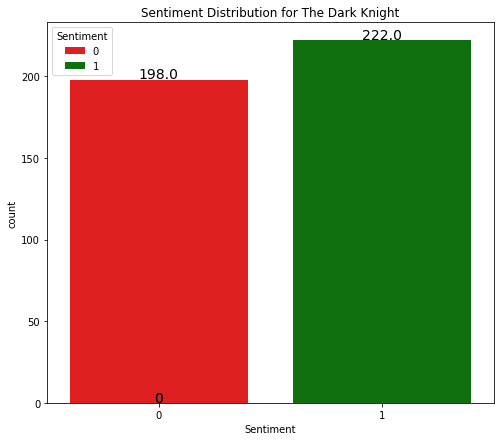

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter and copy to avoid warning
movies_review = movies_review.loc[movies_review['Movie'] == specific_movie].copy()

# Define your sentiment-to-color mapping
palette = {1: 'green', 0: 'red'}

# Plot sentiment distribution with custom colors
plt.figure(figsize=(8, 7))
sns.countplot(x='Sentiment', data=movies_review, hue='Sentiment',palette=palette)
plt.title(f'Sentiment Distribution for {specific_movie}')

# Annotate counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=14, color='black', 
                       xytext=(0, 5), textcoords='offset points')
plt.show()


 # Visualize the most frequent words in the reviews

{'absolutely': 24, 'acting': 24, 'amazing': 20, 'best': 22, 'boring': 19, 'captivating': 12, 'cast': 14, 'cinematography': 20, 'couldn': 18, 'didn': 21, 'direction': 26, 'disappointing': 18, 'edge': 19, 'effects': 26, 'ending': 18, 'fantastic': 24, 'film': 41, 'great': 14, 'heartwarming': 24, 'highly': 20, 'incredible': 26, 'kept': 19, 'lacked': 21, 'laughing': 18, 'like': 21, 'mediocre': 24, 'movie': 106, 'movies': 22, 'originality': 21, 'outstanding': 28, 'performances': 14, 'plot': 48, 'poorly': 24, 'predictable': 27, 'recommend': 20, 'ruined': 26, 'screenplay': 24, 'seat': 19, 'seen': 22, 'soundtrack': 28, 'special': 26, 'stop': 18, 'storyline': 12, 'terrible': 26, 'touching': 24, 'twist': 21, 'uninteresting': 19, 've': 22, 'watching': 13, 'worth': 13, 'written': 24}


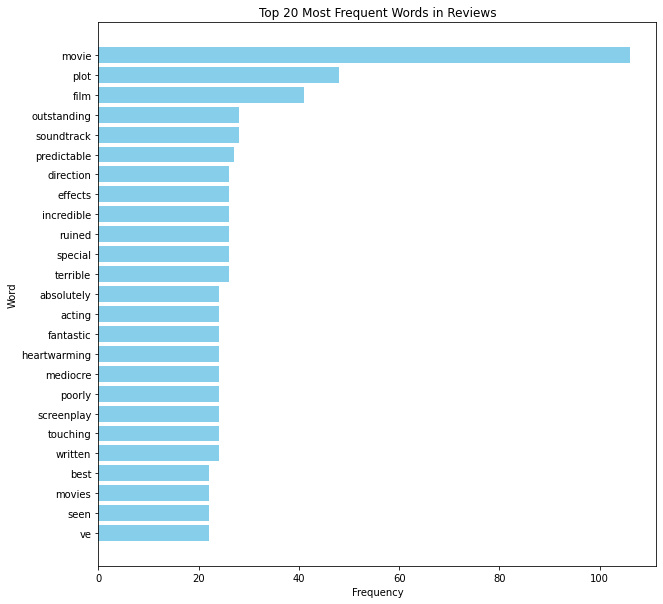

In [14]:
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = count_vectorizer.fit_transform(movies_review['Review'])
words = count_vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
word_freq_dict = dict(zip(words, word_frequencies))
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:25]
print(word_freq_dict)

plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in sorted_word_freq], [x[1] for x in sorted_word_freq], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.gca().invert_yaxis()
plt.show()

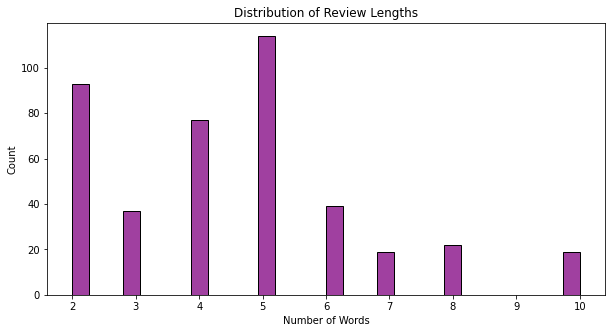

In [15]:
# Analyze the distribution of review lengths
review_lengths = movies_review['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(review_lengths, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

In [16]:
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf'

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data
data = {
    'review': [
        'I love this movie, it is fantastic!',
        'This was a terrible movie, I hated it.',
        'Amazing storyline and great acting.',
        'Not good, very boring and slow.',
        'Fantastic plot and wonderful characters.'
    ],
    'sentiment': [1, 0, 1, 0, 1]
}


In [18]:
# Create DataFrame
df = pd.DataFrame(data)

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['review']
negative_reviews = df[df['sentiment'] == 0]['review']

# Combine all positive and negative reviews
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

In [19]:
# Generate word clouds
if positive_text.strip():
    positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text)
else:
    positive_wordcloud = None

if negative_text.strip():
    negative_wordcloud = WordCloud(width=800, height=400, background_color='green', colormap='Reds').generate(negative_text)
else:
    negative_wordcloud = None

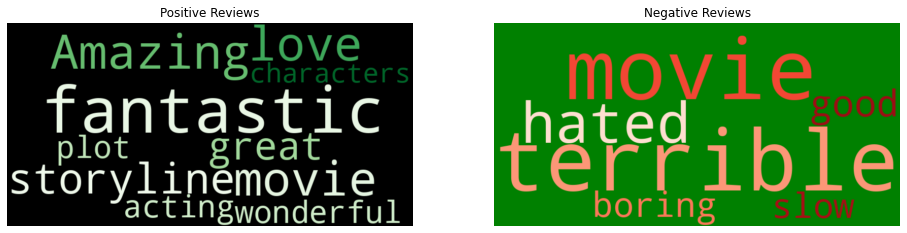

In [20]:
# Plot the word clouds
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

if positive_wordcloud:
    axs[0].imshow(positive_wordcloud, interpolation='bilinear')
    axs[0].set_title('Positive Reviews')
    axs[0].axis('off')
else:
    axs[0].text(0.5, 0.5, 'No Positive Reviews', ha='center', va='center', fontsize=20)
    axs[0].axis('off')

if negative_wordcloud:
    axs[1].imshow(negative_wordcloud, interpolation='bilinear')
    axs[1].set_title('Negative Reviews')
    axs[1].axis('off')
else:
    axs[1].text(0.5, 0.5, 'No Negative Reviews', ha='center', va='center', fontsize=20)
    axs[1].axis('off')

plt.show()